### SG Medical Device Data

https://eservice.hsa.gov.sg/medics/md/mdEnquiry.do

https://eservice.hsa.gov.sg/medics/md/mdEnquiry.do?action=getAllDevices&_ga=2.192127402.1803903920.1554265549-551332391.1551944793

#### This webscraper uses Selenium webdriver

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
from selenium.webdriver.support.select import Select
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from random import randint
import urllib.parse
import warnings
warnings.filterwarnings('ignore')
headers = {"Accept-Language" : "en-US,en;q=0.5"}
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from selenium.common.exceptions import NoSuchElementException, ElementNotVisibleException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [7]:
url = 'https://eservice.hsa.gov.sg/medics/md/mdEnquiry.do'

In [8]:
page = requests.get(url)

In [9]:
page

<Response [200]>

In [14]:
website1 = 'https://eservice.hsa.gov.sg/medics/md/mdEnquiry.do?action=getAllDevices&_ga=2.192127402.1803903920.1554265549-551332391.1551944793'
# chrome_options = Options()
# chrome_options.add_argument("--lang=en");
# chrome_options.add_experimental_option('excludeSwitches', ['enable-logging'])
# prefs = {
#         "translate_whitelists": {'sg':'en'},
#        "translate":{"enabled":"True"}}
# chrome_options.add_experimental_option("prefs", prefs)
driver = webdriver.Chrome('C:\webdrivers\chromedriver.exe')
time.sleep(10)
driver.get(website1)
time.sleep(10)

In [13]:
#driver.quit()

#### NEXT

In [16]:
driver.find_element(By.LINK_TEXT , '[next]').click()

#### Product URL

In [ ]:
Product_url_raw = driver.find_element(By.XPATH , "//table[@class = 'fmTbl']/tbody/tr[2]/td/a").get_attribute('href')


In [63]:
base_url = "https://eservice.hsa.gov.sg/medics/md/mdEnquiry.do?action=getDeviceInfo&devId="

In [52]:
Product_url_raw

'javascript:openWindow("getDeviceInfo","C5024512375C-23")'

In [61]:
Product_url_raw.split('"')

['javascript:openWindow(', 'getDeviceInfo', ',', 'C5024512375C-23', ')']

In [59]:
Product_url_raw.split('"')[-2]

'C5024512375C-23'

In [62]:
Product_url_raw = Product_url_raw.split('"')[-2]

In [64]:
Product_url = base_url + Product_url_raw

In [65]:
Product_url

'https://eservice.hsa.gov.sg/medics/md/mdEnquiry.do?action=getDeviceInfo&devId=C5024512375C-23'

In [66]:
driver.get(Product_url)

#### Headings

- Device Name
- Description
- Medical Speciality Area
- Medical Device Class
- Device Registration Number
- Registration Date
- Device System Info
- Product Owner
- Registrant
- Model Name
- Identifier
- Place of Manufacture

In [97]:
#driver.get('https://eservice.hsa.gov.sg/medics/md/mdEnquiry.do?action=getDeviceInfo&devId=C5024512375C-23')

In [100]:
Description_table = driver.find_elements(By.XPATH , "//table[@class='fmTbl']/tbody/tr")

In [101]:
for i in Description_table:
    print(i.text)

Device Name: 1ST SURGICONCEPT SPRING THREAD® ELASTIC SUTURE WITH COGS [1st SurgiConcept]
Description: Mild to moderate ptosis of the face according to the reference and chosen implantation technique by the practitioner.
Medical Specialty Area: General & Plastic Surgery
Medical Device Class: Class C medical device
Device Registration No: DE0507681
Registration Date: 12/01/2023
Change Notification Approval Date: Not Applicable
Device System Info: [Sterile Medical Device], • Elastic suture with cogs, nonabsorbable, sterile • Medical device made of a multifilament PET core, coated with implantable silicone designing cogs • Sterilised by Ethylene Oxide
 
Product Owner
1. 1st SurgiConcept  [1st SurgiConcept] 96, rue du Pont Rompu, BP.90440, 59203 Tourcoing Cedex, Tourcoing, FRANCE
Registrant
1. PARVUS (S) PTE. LTD.  231 MOUNTBATTEN ROAD, MOUNTBATTEN CENTRE, #01-07, SINGAPORE 397999
Models
Close
 
Note: All device listings on the Singapore Medical Device Register (SMDR) are active. Class A me

#### Device Name

In [111]:
for i in Description_table:
    if i.text.startswith('Device Name:'):
        print(i.text)
        Devicename = i.text.replace('Device Name: ' , '')
        print(Devicename)

Device Name: 1ST SURGICONCEPT SPRING THREAD® ELASTIC SUTURE WITH COGS [1st SurgiConcept]
1ST SURGICONCEPT SPRING THREAD® ELASTIC SUTURE WITH COGS [1st SurgiConcept]


#### Description

In [112]:
for i in Description_table:
    if i.text.startswith('Description:'):
        print(i.text)
        Description = i.text.replace('Description: ' , '')
        print(Description)

Description: Mild to moderate ptosis of the face according to the reference and chosen implantation technique by the practitioner.
Mild to moderate ptosis of the face according to the reference and chosen implantation technique by the practitioner.


#### Medical Speciality Area

In [114]:
for i in Description_table:
    if i.text.startswith('Medical Specialty Area:'):
        print(i.text)
        MSA = i.text.replace('Medical Specialty Area: ' , '')
        print(MSA)

Medical Specialty Area: General & Plastic Surgery
General & Plastic Surgery


#### Medical Device Class

In [115]:
for i in Description_table:
    if i.text.startswith('Medical Device Class:'):
        print(i.text)
        MDC = i.text.replace('Medical Device Class: ' , '')
        print(MDC)

Medical Device Class: Class C medical device
Class C medical device


#### Device Registration Number

In [116]:
for i in Description_table:
    if i.text.startswith('Device Registration No:'):
        print(i.text)
        DRN = i.text.replace('Device Registration No: ' , '')
        print(DRN)

Device Registration No: DE0507681
DE0507681


#### Registration Date

In [117]:
for i in Description_table:
    if i.text.startswith('Registration Date:'):
        print(i.text)
        RDT = i.text.replace('Registration Date: ' , '')
        print(RDT)

Registration Date: 12/01/2023
12/01/2023


#### Device System Info

In [118]:
for i in Description_table:
    if i.text.startswith('Device System Info:'):
        print(i.text)
        DSI = i.text.replace('Device System Info: ' , '')
        print(DSI)

Device System Info: [Sterile Medical Device], • Elastic suture with cogs, nonabsorbable, sterile • Medical device made of a multifilament PET core, coated with implantable silicone designing cogs • Sterilised by Ethylene Oxide
[Sterile Medical Device], • Elastic suture with cogs, nonabsorbable, sterile • Medical device made of a multifilament PET core, coated with implantable silicone designing cogs • Sterilised by Ethylene Oxide


#### Product Owner

In [81]:
driver.find_element(By.XPATH , "//table[4][@class='fmTbl']/tbody/tr/td").text

'1. 1st SurgiConcept  [1st SurgiConcept] 96, rue du Pont Rompu, BP.90440, 59203 Tourcoing Cedex, Tourcoing, FRANCE'

#### Registrant

In [83]:
driver.find_element(By.XPATH , "//table[6][@class='fmTbl']/tbody/tr/td").text

'1. PARVUS (S) PTE. LTD.  231 MOUNTBATTEN ROAD, MOUNTBATTEN CENTRE, #01-07, SINGAPORE 397999'

#### Model Name from Table

depends on the number of Rows of the table

In [91]:
driver.find_element(By.XPATH , "//table[@border='1']/tbody/tr[2]").text[2:]

'Spring Thread® Face Thread FL 6-300 FRANCE'

In [92]:
driver.find_element(By.XPATH , "//table[@border='1']/tbody/tr[3]").text[2:]

'Spring Thread® Face Thread / Needle FA 6-300 FRANCE'

### Qty_list

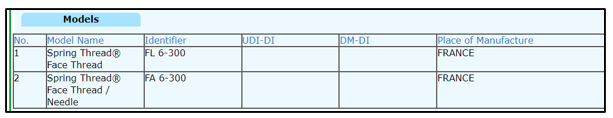

In [119]:
Qty_list = driver.find_elements(By.XPATH , "//table[@border='1']/tbody/tr")

In [120]:
len(Qty_list)

3

### Click on BACK 

In [93]:
driver.back()

In [94]:
#takes 5 secs approx

### MAIN Web Scraping

In [123]:
base_url = "https://eservice.hsa.gov.sg/medics/md/mdEnquiry.do?action=getDeviceInfo&devId="

In [233]:
driver.quit()

In [234]:
website1 = 'https://eservice.hsa.gov.sg/medics/md/mdEnquiry.do?action=getAllDevices&_ga=2.192127402.1803903920.1554265549-551332391.1551944793'
driver = webdriver.Chrome('C:\webdrivers\chromedriver.exe')
time.sleep(10)
driver.get(website1)
time.sleep(10)

#### Note : 
- "counter" stores the Page number from where you would like to start
- So, edit the "counter" value , as needed
- while counter < "the number" :::: the number should be the page number where you want to end

In [251]:
Device_Name = []
Description_list = []
Medical_Specialty_Area = []
Medical_Device_Class = []
Device_Registration = []
Registration_Date = []
Device_System = []
Product_Owner = []
Registrant_list = []
Model_list = []

counter = 1951
while counter < 1952:
    Product_url_raw = driver.find_element(By.XPATH , "//table[@class = 'fmTbl']/tbody/tr[2]/td/a").get_attribute('href')
    Product_url_raw = Product_url_raw.split('"')[-2]
    Product_url = base_url + Product_url_raw
    time.sleep(4)
    driver.get(Product_url)
    
    Qty_list = driver.find_elements(By.XPATH , "//table[@border='1']/tbody/tr")
    length_Qty_list = len(Qty_list)
    Description_table = driver.find_elements(By.XPATH , "//table[@class='fmTbl']/tbody/tr")
    
    for j in range(length_Qty_list-1):
        
        for i in Description_table:
            if i.text.startswith('Device Name:'):
                flagDevicename = 1
                Devicename = i.text.replace('Device Name: ' , '')
        if flagDevicename == 1:
            Device_Name.append(Devicename)
        else:
            Device_Name.append('n/a')

        for i in Description_table:
            if i.text.startswith('Description:'):
                flagDescription = 1
                Description = i.text.replace('Description: ' , '')
        if flagDescription == 1:
            Description_list.append(Description)
        else:
            Description_list.append('n/a')

        for i in Description_table:
            if i.text.startswith('Medical Specialty Area:'):
                flagMSA = 1
                MSA = i.text.replace('Medical Specialty Area: ' , '')
        if flagMSA == 1:
            Medical_Specialty_Area.append(MSA)
        else:
            Medical_Specialty_Area.append('n/a')

        for i in Description_table:
            if i.text.startswith('Medical Device Class:'):
                flagMDC = 1
                MDC = i.text.replace('Medical Device Class: ' , '')
        if flagMDC ==1:
            Medical_Device_Class.append(MDC)
        else:
            Medical_Device_Class.append('n/a')

        for i in Description_table:
            if i.text.startswith('Device Registration No:'):
                flagDRN = 1
                DRN = i.text.replace('Device Registration No: ' , '')
        if flagDRN == 1:
            Device_Registration.append(DRN)
        else:
            Device_Registration.append('n/a')

        for i in Description_table:
            if i.text.startswith('Registration Date:'):
                flagRDT = 1
                RDT = i.text.replace('Registration Date: ' , '')
        if flagRDT == 1:
            Registration_Date.append(RDT)
        else:
            Registration_Date.append('n/a')

        for i in Description_table:
            if i.text.startswith('Device System Info:'):
                flagDSI = 1
                DSI = i.text.replace('Device System Info: ' , '')
        if flagDSI == 1:
            Device_System.append(DSI)
        else:
            Device_System.append('n/a')

        ProductOwner = driver.find_element(By.XPATH , "//table[4][@class='fmTbl']/tbody/tr/td").text
        try:
            Product_Owner.append(ProductOwner)
        except:
            Product_Owner.append('n/a')

        Registrant = driver.find_element(By.XPATH , "//table[6][@class='fmTbl']/tbody/tr/td").text
        try:
            Registrant_list.append(Registrant)
        except:
            Registrant_list.append('n/a')
            
    for i in range(2, len(Qty_list)+1):
        ModelName = driver.find_element(By.XPATH , "//table[@border='1']/tbody/tr[%i]"%i).text[2:]
        Model_list.append(ModelName)

    
    time.sleep(4)
    driver.get(website1)
    time.sleep(8)
    driver.find_element(By.CLASS_NAME, "txtNumInput").clear()
    driver.find_element(By.CLASS_NAME, "txtNumInput").send_keys(counter)
    driver.find_element(By.NAME, "Go").click()
    counter += 1

In [253]:
SG_MDR.shape

(176, 10)

In [252]:
SG_MDR = pd.DataFrame({'Device_Name' : Device_Name, 'Description_list' : Description_list  ,
                       'Medical_Specialty_Area' : Medical_Specialty_Area, 'Medical_Device_Class' : Medical_Device_Class  , 
                       'Device_Registration' : Device_Registration , 'Registration_Date' : Registration_Date , 
                       'Device_System' : Device_System,
    'Product_Owner' :Product_Owner, 'Registrant_list' : Registrant_list ,  'Model_list' : Model_list}) 

In [231]:
SG_MDR

,Device_Name,Description_list,Medical_Specialty_Area,Medical_Device_Class,Device_Registration,Registration_Date,Device_System,Product_Owner,Registrant_list,Model_list
0,Alcon Accurus® 800CS Surgical System and Acces...,Combined procedure machine capable of both vit...,Ophthalmology,Class C medical device,DE0001905,06/10/2005,"[System or Procedure Pack], Compressor driven ...","1. Alcon Laboratories, Inc. [Alcon] 6201 Sout...","1. ALCON PTE LTD 1 FUSIONOPOLIS WALK, SOLARIS...",Alcon Accurus 800CS 8065741008 -
1,Alcon Accurus® 800CS Surgical System and Acces...,Combined procedure machine capable of both vit...,Ophthalmology,Class C medical device,DE0001905,06/10/2005,"[System or Procedure Pack], Compressor driven ...","1. Alcon Laboratories, Inc. [Alcon] 6201 Sout...","1. ALCON PTE LTD 1 FUSIONOPOLIS WALK, SOLARIS...",ACCURUS® High Brightness Xenon Illuminator 806...
2,Alcon Accurus® 800CS Surgical System and Acces...,Combined procedure machine capable of both vit...,Ophthalmology,Class C medical device,DE0001905,06/10/2005,"[System or Procedure Pack], Compressor driven ...","1. Alcon Laboratories, Inc. [Alcon] 6201 Sout...","1. ALCON PTE LTD 1 FUSIONOPOLIS WALK, SOLARIS...",ACCURUS® Instrumentation Cart with Motorized I...
3,Alcon Accurus® 800CS Surgical System and Acces...,Combined procedure machine capable of both vit...,Ophthalmology,Class C medical device,DE0001905,06/10/2005,"[System or Procedure Pack], Compressor driven ...","1. Alcon Laboratories, Inc. [Alcon] 6201 Sout...","1. ALCON PTE LTD 1 FUSIONOPOLIS WALK, SOLARIS...",ACCURUS® Anterior Pak 8065740885 -
4,Alcon Accurus® 800CS Surgical System and Acces...,Combined procedure machine capable of both vit...,Ophthalmology,Class C medical device,DE0001905,06/10/2005,"[System or Procedure Pack], Compressor driven ...","1. Alcon Laboratories, Inc. [Alcon] 6201 Sout...","1. ALCON PTE LTD 1 FUSIONOPOLIS WALK, SOLARIS...",ACCURUS® Anterior Vitrectomy Probe 8065803650 -
...,...,...,...,...,...,...,...,...,...,...
11001,Cook Celect Platinum Vena Cava Filter Set [Cook],The Cook Celect Platinum Filter implant is int...,Cardiovascular,Class D medical device,DE0014943,17/03/2014,"[Sterile Medical Device], Vena cava filter,Ste...","1. William Cook Europe Aps [Cook] Sandet 6, 4...",1. COOK SOUTH EAST ASIA PTE LTD 38 BEACH ROAD...,Cook Celect Platinum Vena Cava Filter Set for ...
11002,Cook Celect Platinum Vena Cava Filter Set [Cook],The Cook Celect Platinum Filter implant is int...,Cardiovascular,Class D medical device,DE0014943,17/03/2014,"[Sterile Medical Device], Vena cava filter,Ste...","1. William Cook Europe Aps [Cook] Sandet 6, 4...",1. COOK SOUTH EAST ASIA PTE LTD 38 BEACH ROAD...,Cook Celect Platinum Vena Cava Filter Set for ...
11003,Cook Celect Platinum Vena Cava Filter Set [Cook],The Cook Celect Platinum Filter implant is int...,Cardiovascular,Class D medical device,DE0014943,17/03/2014,"[Sterile Medical Device], Vena cava filter,Ste...","1. William Cook Europe Aps [Cook] Sandet 6, 4...",1. COOK SOUTH EAST ASIA PTE LTD 38 BEACH ROAD...,Cook Celect Platinum Vena Cava Filter Set for ...
11004,Cook Ciaglia Blue Rhino G2 Advanced Percutaneo...,The Ciaglia Blue Rhino G2 Advanced Percutaneou...,General Hospital,Class B medical device,DE0500441,08/07/2016,"[Sterile Medical Device], Sterilized by Ethyle...",1. Cook Incorporated [Cook Incorporated] 750 ...,1. COOK SOUTH EAST ASIA PTE LTD 38 BEACH ROAD...,Ciaglia Blue Rhino G2 C-PTIS-100-FLEX-HC-G UNI...


In [254]:
SG_MDR.to_excel('SG_MDR.xlsx', index = False)

- Aisha Khalid
- aisha.khalid@clearstate.com